# Feature Engineering with Pandas

Steps:
1. Age Categories.
2. Purchase Frequency.
3. Average Purchase Amount.
4. Recency (Days Since Last Purchase).
5. Seasonality.
6. Gender Encodinge Analysis.
7. Inspect unique values for categorical features.
8. Inspect summary statistics for numerical features.
9. Visualizations.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("eda_ready_dataset.csv", parse_dates=["PurchaseDate"])

In [19]:
# Age Categories
def age_category(age):
    if age < 30:
        return "Young"
    elif 30 <= age <= 50:
        return "Middle-aged"
    else:
        return "Senior"

df["AgeCategory"] = df["Age"].apply(age_category)

In [20]:
# Purchase Frequency
purchase_frequency = df.groupby("CustomerID")["PurchaseAmount"].count()
df["PurchaseFrequency"] = df["CustomerID"].map(purchase_frequency)

In [21]:
# Average Purchase Amount
avg_purchase_amount = df.groupby("CustomerID")["PurchaseAmount"].mean()
df["AvgPurchaseAmount"] = df["CustomerID"].map(avg_purchase_amount)

In [22]:
# Recency (Days Since Last Purchase)
last_purchase_date = df.groupby("CustomerID")["PurchaseDate"].max()
df["Recency"] = (pd.to_datetime("today") - df["CustomerID"].map(last_purchase_date)).dt.days

In [23]:
# Seasonality
df["PurchaseMonth"] = df["PurchaseDate"].dt.month
df["PurchaseSeason"] = df["PurchaseMonth"].apply(
    lambda x: "Winter" if x in [12, 1, 2] else 
              "Spring" if x in [3, 4, 5] else 
              "Summer" if x in [6, 7, 8] else 
              "Autumn"
)

In [24]:
# Gender Encoding
df["GenderEncoded"] = df["Gender"].map({"Male": 0, "Female": 1})

# Save the enriched dataset
df.to_csv("feature_engineered_dataset.csv", index=False)

# Display the first few rows
df.head()

,CustomerID,Name,Age,Gender,PurchaseAmount,PurchaseDate,YearMonth,AgeCategory,PurchaseFrequency,AvgPurchaseAmount,Recency,PurchaseMonth,PurchaseSeason,GenderEncoded
0,1,John Doe,40.0,Female,400.000000,2023-03-05,2023-03,Middle-aged,1,400.000000,637,3,Spring,1
1,2,Jane Smith,40.0,Female,10000.000000,2023-03-05,2023-03,Middle-aged,1,10000.000000,637,3,Spring,1
2,3,Bob Brown,45.0,Female,100.000000,2023-03-12,2023-03,Middle-aged,1,100.000000,630,3,Spring,1
3,4,Alice White,40.0,Male,2685.227273,2023-03-05,2023-03,Middle-aged,1,2685.227273,637,3,Spring,0
4,5,Charlie Black,35.0,Male,400.000000,2023-03-05,2023-03,Middle-aged,1,400.000000,637,3,Spring,0


In [25]:
# Inspect unique values for categorical features
print("Unique values for 'AgeCategory':", df["AgeCategory"].unique())
print("Unique values for 'PurchaseSeason':", df["PurchaseSeason"].unique())

# Inspect summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df[["PurchaseFrequency", "AvgPurchaseAmount", "Recency", "GenderEncoded"]].describe())

Unique values for 'AgeCategory': ['Middle-aged' 'Young']
Unique values for 'PurchaseSeason': ['Spring' 'Winter']

Summary statistics for numerical features:
       PurchaseFrequency  AvgPurchaseAmount     Recency  GenderEncoded
count               45.0          45.000000   45.000000      45.000000
mean                 1.0        2989.141414  645.377778       0.400000
std                  0.0        4112.755063   19.805060       0.495434
min                  1.0         100.000000  630.000000       0.000000
25%                  1.0         300.000000  637.000000       0.000000
50%                  1.0         400.000000  637.000000       0.000000
75%                  1.0        2685.227273  637.000000       1.000000
max                  1.0       10000.000000  686.000000       1.000000


C:\Users\48799\AppData\Local\Temp\ipykernel_8824\1606659311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AgeCategory", data=df, palette="viridis")


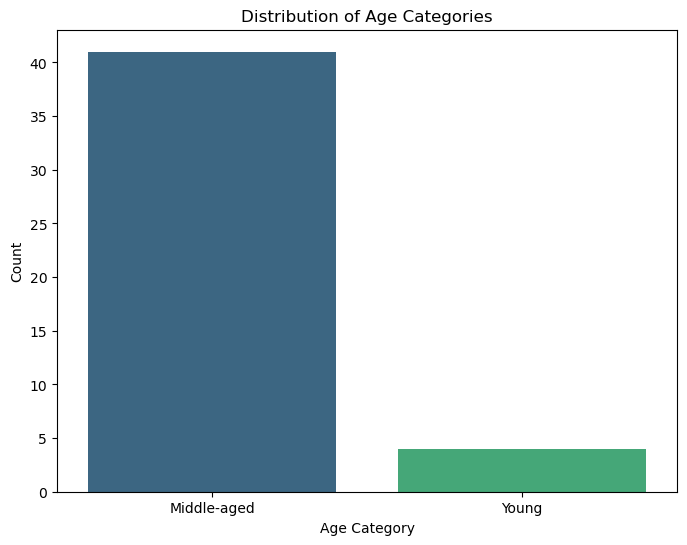

In [35]:
# Age Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="AgeCategory", data=df, palette="viridis")
plt.title("Distribution of Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()

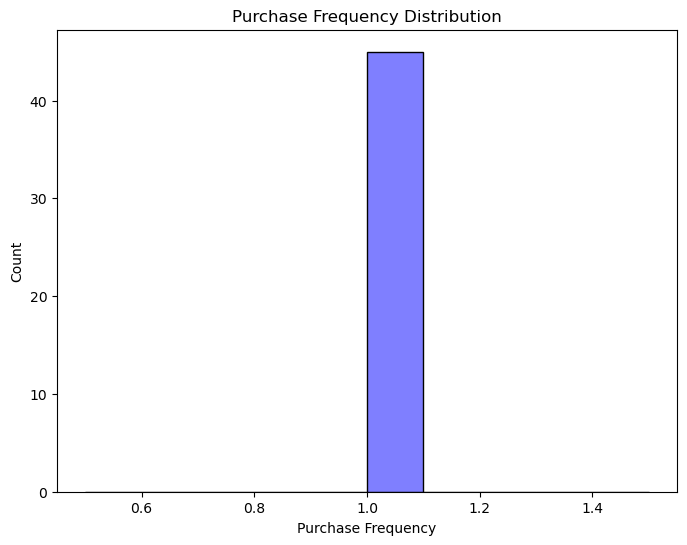

In [37]:
# Purchase Frequency Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["PurchaseFrequency"], bins=10, kde=True, color="blue")
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.show()

C:\Users\48799\AppData\Local\Temp\ipykernel_8824\1718527144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeCategory", y="AvgPurchaseAmount", data=df, palette="coolwarm")


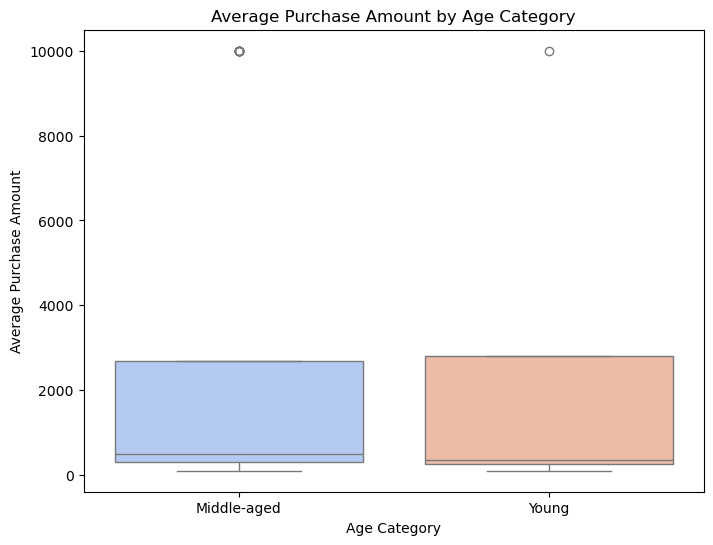

In [39]:
# Average Purchase Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x="AgeCategory", y="AvgPurchaseAmount", data=df, palette="coolwarm")
plt.title("Average Purchase Amount by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Average Purchase Amount")
plt.show()

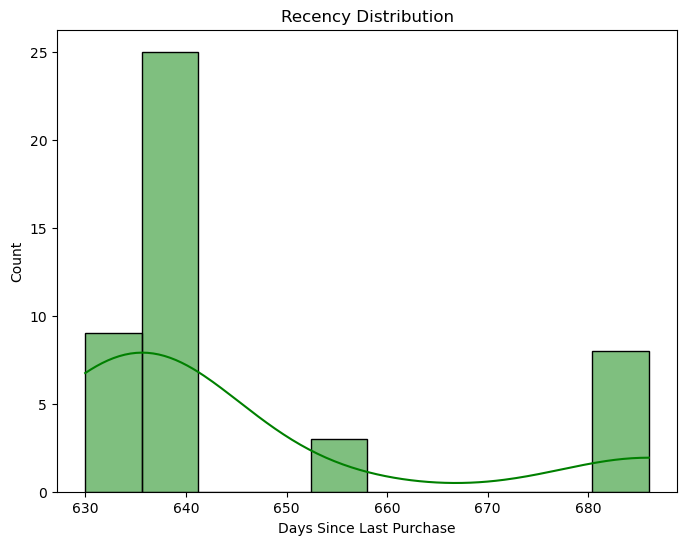

In [41]:
# Recency Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Recency"], bins=10, kde=True, color="green")
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Count")
plt.show()

C:\Users\48799\AppData\Local\Temp\ipykernel_8824\4022749988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PurchaseSeason", data=df, palette="magma")


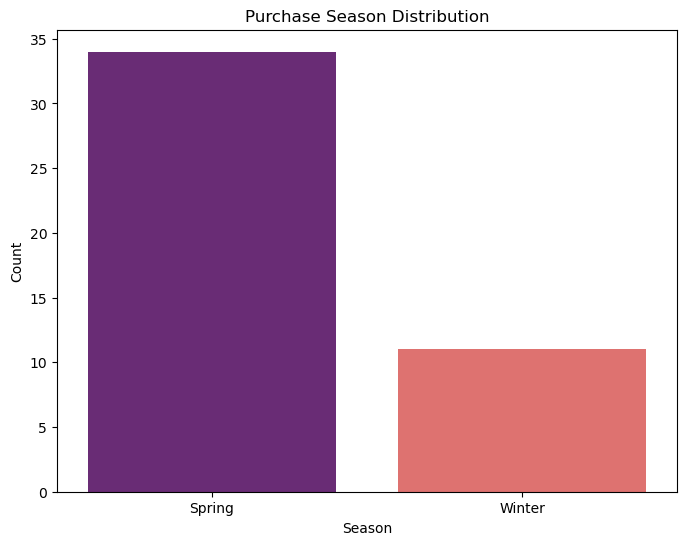

In [43]:
# Purchase Season
plt.figure(figsize=(8, 6))
sns.countplot(x="PurchaseSeason", data=df, palette="magma")
plt.title("Purchase Season Distribution")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()